# Import packages and load datasets

In [1]:
import glob, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Dataset original
# df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('../dist/', "*.csv"))))
df = pd.read_csv('../dist/df_subset.csv')

In [3]:
# Dataset secundário
df_v2 = df

# Datas
df_v2['time'] = pd.to_datetime(df_v2['time'], format='%Y-%m-%d %H:%M:%S.%f')
df_v2['year'] = [data.year for data in df_v2['time']]
df_v2['month'] = [data.month for data in df_v2['time']]
df_v2['day'] = [data.day for data in df_v2['time']]
df_v2['hour'] = [data.hour for data in df_v2['time']]

# Exploratory data analysis (EDA)

In [4]:
# Teste para colunas vazias
df_na = df[[column for column in df if df[column].count() / len(df) >= 0.99]]

In [5]:
if pd.Series.tolist(df.columns) == pd.Series.tolist(df_na.columns):
    print("base sem null's! =)")
else:
    print("base com null's! =(")

base sem null's! =)


In [6]:
# Infos do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
time        100000 non-null datetime64[ns]
ca          100000 non-null object
unit        100000 non-null object
scp         100000 non-null object
station     99828 non-null object
linename    99828 non-null object
division    99828 non-null object
desc        100000 non-null object
entries     100000 non-null float64
exits       100000 non-null float64
year        100000 non-null int64
month       100000 non-null int64
day         100000 non-null int64
hour        100000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 10.7+ MB


In [7]:
# Descrição das features númericas do dataset
df.describe()

entries         exits      year     month            day  \
count  1.000000e+05  1.000000e+05  100000.0  100000.0  100000.000000   
mean   2.927970e+06  2.443422e+06    2010.0       4.0      18.298880   
std    3.096347e+06  6.509806e+06       0.0       0.0       0.987188   
min    0.000000e+00 -1.447243e+08    2010.0       4.0      17.000000   
25%    5.441925e+05  3.230530e+05    2010.0       4.0      17.000000   
50%    2.160288e+06  1.481380e+06    2010.0       4.0      18.000000   
75%    4.056736e+06  3.076883e+06    2010.0       4.0      19.000000   
max    3.156438e+07  3.303235e+08    2010.0       4.0      20.000000   

               hour  
count  100000.00000  
mean       10.24946  
std         6.64623  
min         0.00000  
25%         5.00000  
50%         9.00000  
75%        16.00000  
max        23.00000

In [8]:
# Leitura do cabeçalho
df.head()

time    ca  unit       scp        station linename division  \
0 2010-04-17 04:00:00  A002  R051  02-00-00  LEXINGTON AVE   456NQR      BMT   
1 2010-04-17 04:00:00  A002  R051  02-00-01  LEXINGTON AVE   456NQR      BMT   
2 2010-04-17 04:00:00  A002  R051  02-03-00  LEXINGTON AVE   456NQR      BMT   
3 2010-04-17 04:00:00  A002  R051  02-03-01  LEXINGTON AVE   456NQR      BMT   
4 2010-04-17 04:00:00  A002  R051  02-03-02  LEXINGTON AVE   456NQR      BMT   

      desc    entries      exits  year  month  day  hour  
0  REGULAR  2704717.0   928793.0  2010      4   17     4  
1  REGULAR  2697632.0   566683.0  2010      4   17     4  
2  REGULAR  1127722.0  3943492.0  2010      4   17     4  
3  REGULAR  2425570.0  3733289.0  2010      4   17     4  
4  REGULAR  2214633.0  3021589.0  2010      4   17     4

### Boxplot

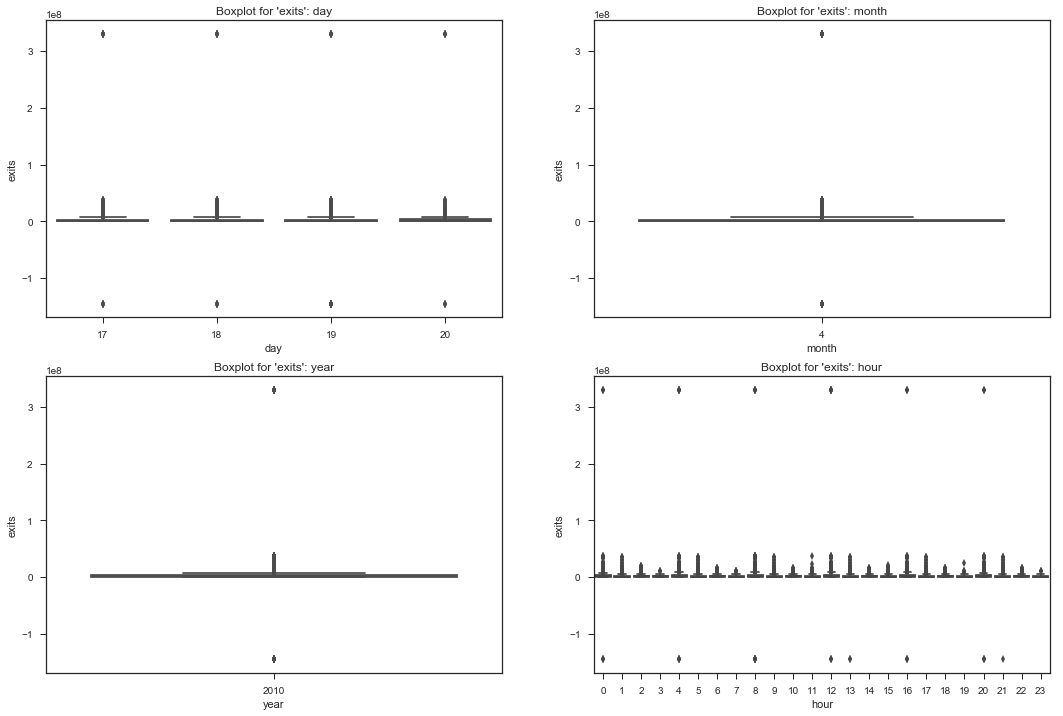

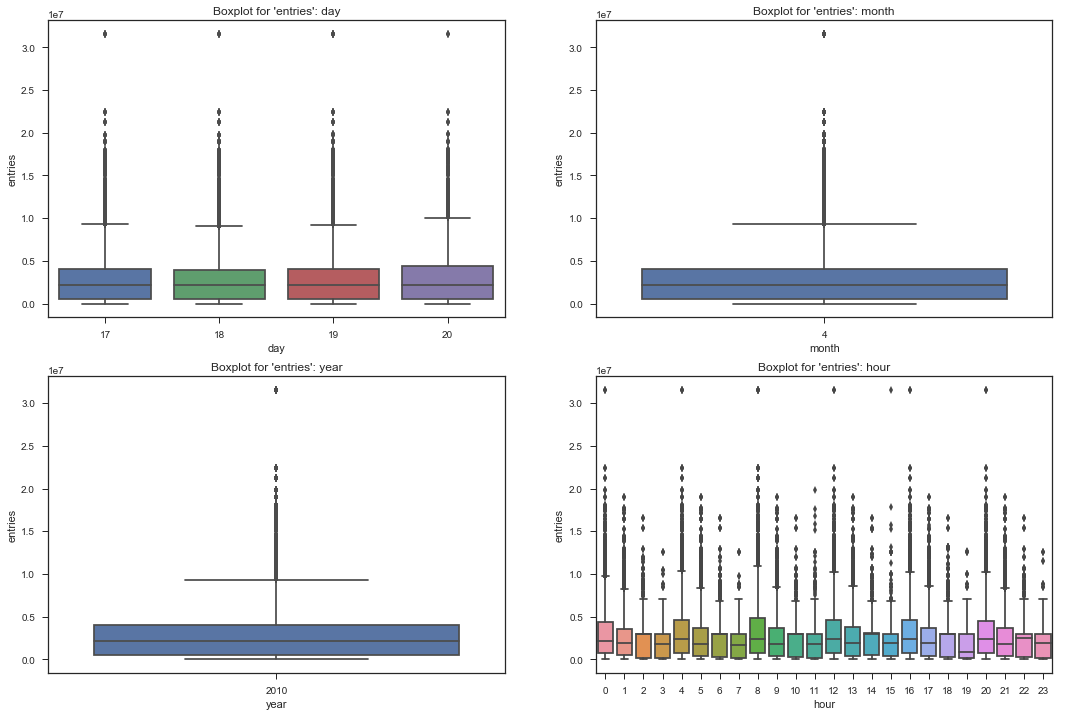

In [10]:
x_list = ['day','month','year','hour']
y_list = ['exits','entries']
x_list.count
for y in y_list:
    fig, ax = plt.subplots(int(len(x_list)/2), 2, figsize = (18, 12))

    for i, ax in enumerate(fig.axes):
        sns.set(style="ticks", palette="deep")
        sns.boxplot(
            x=x_list[i], 
            y=y,
            data=df,
            ax=ax
        ).set_title("Boxplot for '"+y+"': "+x_list[i])

### Convert features to Categorical

In [ ]:
# Conversão de object para númerico
for cat_feature in df_v2.select_dtypes(include=['object']).columns:
    df_v2[cat_feature] = pd.Categorical(df_v2[cat_feature]).codes

In [ ]:
df_v2.head()

In [ ]:
# Resumo de cada feature
for coluna in df_v2.columns:
    print(df_v2[coluna].describe())
    print('\n\n')

### Histogram

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_hist = df_v2.select_dtypes(include=numerics)
df_hist = df_hist.sort_index(axis=1)

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Correlation

In [ ]:
corr = df_v2.corr()
plt.figure(figsize=(11, 9))

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Figure
f, ax = plt.subplots(figsize=(11, 9))

# Colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr, 
            cmap=cmap, 
            mask=mask,
            vmax=.3,             
            linewidths=.5,
            center=0,
            annot=True, 
            annot_kws={"size": 8}, 
            square=True, 
            cbar_kws={"shrink": .5});

### Linear Regression - 'entries' vs featuare

In [ ]:
df_v3 = df_v2

fig, ax = plt.subplots(round(len(df_v3.columns) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(df_v3.columns) - 1:        
        sns.regplot(x=df_v3[df_v3.columns[i]],y='entries', data=df_v3, ax=ax)

### Linear Regression - 'exits' vs featuare

In [ ]:
df_v3 = df_v2

fig, ax = plt.subplots(round(len(df_v3.columns) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(df_v3.columns) - 1:        
        sns.regplot(x=df_v3[df_v3.columns[i]],y='exits', data=df_v3, ax=ax)